In [23]:
import cv2
import sys
import os.path as osp
import matplotlib.pyplot as plt

def detect(filename, outfile, cascade_file = "./lbpcascade_animeface.xml"):
    if not osp.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    
    # Note: This overwrites the file in the case of multiple detected faces, can be adjusted if not desired behaviour
    for (x, y, w, h) in faces:
        # Widen face rectangle slightly to include more head/hair
        cropw = int(w*1.2)
        croph = int(h*1.2)
        cropx = int(x-(cropw-w)/2)
        cropy = int(y-(croph-h)/2)
        
        if (cropx < 0):
            cropx = 0
        if (cropy < 0):
            cropy = 0
        
        crop_img = image[cropy:cropy+croph, cropx:cropx+cropw]
        
        # For test previews
        #cv2.imshow("AnimeFaceDetect", crop_img)
        #cv2.waitKey(0)
        last_occurence = outfile.rfind('/')
        filtered_dir = outfile[:last_occurence]
        if not os.path.exists(filtered_dir):
            os.makedirs(filtered_dir)
        cv2.imwrite(outfile, crop_img)


In [29]:
def detect_debug(filename, cascade_file = "./lbpcascade_animeface.xml"):
    if not osp.isfile(cascade_file):
        raise RuntimeError("%s: not found" % cascade_file)

    cascade = cv2.CascadeClassifier(cascade_file)
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)
    
    faces = cascade.detectMultiScale(gray,
                                     # detector options
                                     scaleFactor = 1.1,
                                     minNeighbors = 5,
                                     minSize = (24, 24))
    
    # Note: This overwrites the file in the case of multiple detected faces, can be adjusted if not desired behaviour
    for (x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = image[y:y+h, x:x+w]

    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20, 20))
    plt.imshow(img)
    plt.show()


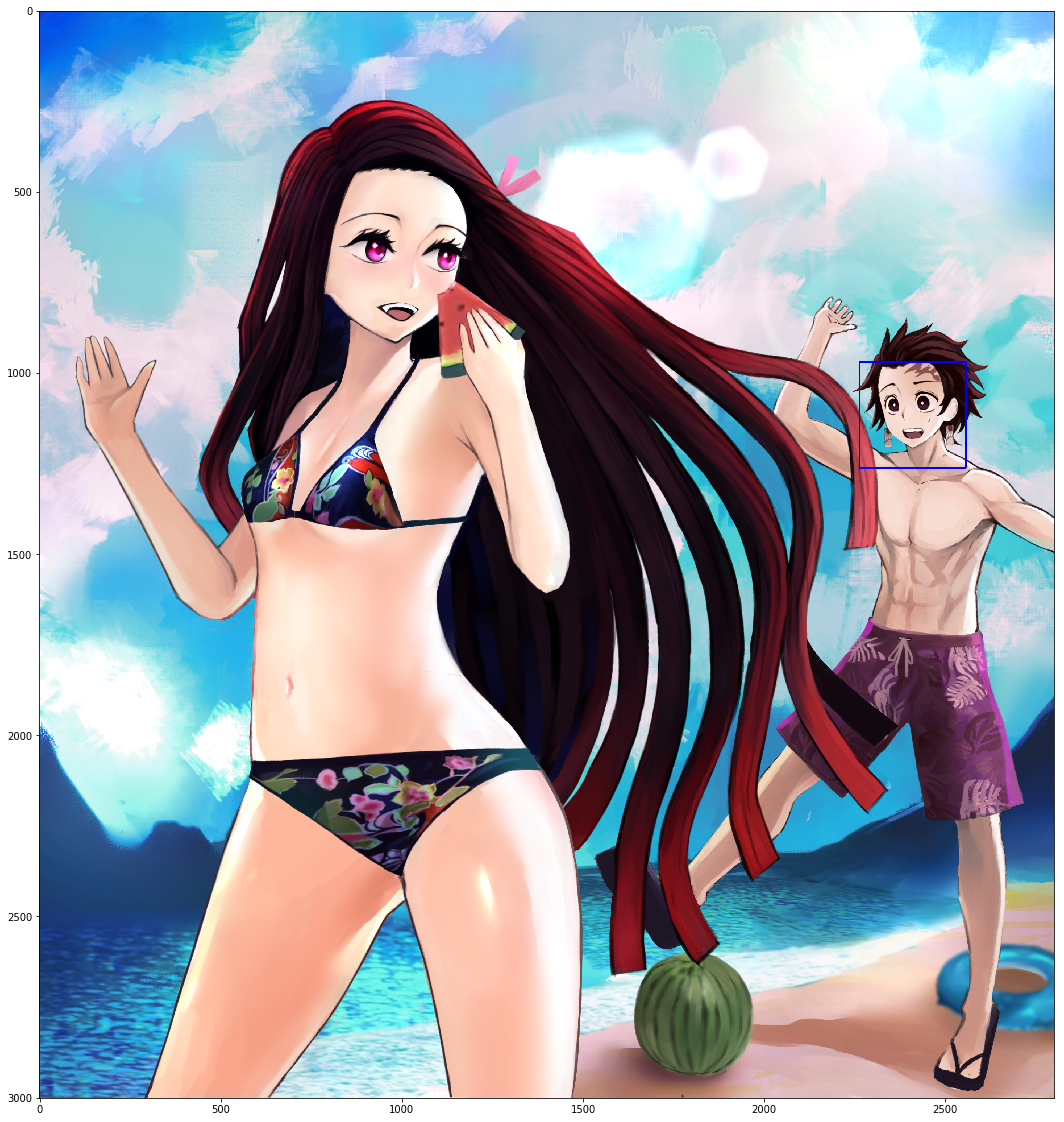

In [33]:
# Test detection on a single image
img_dir = 'DanbooruDownloader/deduplicated'

detect("DanbooruDownloader/deduplicated/s - 2738206 - 2girls black_hair black_legwear blue_eyes fox_mask gotoug.jpg", "test.jpg")
# fail case, E
#detect_debug(osp.join(img_dir, "s - 2738206 - 2girls black_hair black_legwear blue_eyes fox_mask gotoug.jpg"))
#detect_debug(osp.join(img_dir, "s - 3622961 - 1girl absurdres bamboo bare_tree bit_gag black_hair blurr.png"))
detect_debug(osp.join(img_dir, "s - 17787486 - duo female high resolution kamado nezuko.jpg"))


In [ ]:
ids=[]
count = 0

import json
import glob

for filename in glob.glob('images/*.jpg'):
    detect(filename, "faces/" + filename[filename.rfind("\\")+1:])
    count += 1
    if (count%1000 == 0):
        print("Processed iamge {}.".format(filename))

In [ ]:
# Define image size for future steps

IMG_SIZE = 240

In [ ]:
# Resize all images to target dimensions

ids=[]
count = 0

import cv2
import json
import glob

for filename in glob.glob('faces/*.jpg'):
    outfile = "faces_{}px/".format(IMG_SIZE) + filename[filename.rfind("\\")+1:]
    
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    
    height, width = image.shape[:2]
    
    if height == width:
        if width >= IMG_SIZE:
            small = cv2.resize(image, (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_AREA)
            # cv2.imshow("Resized", small)
            cv2.imwrite(outfile, small)
    

In [ ]:
# Build a composite image of everything in the directory
# (see "flippy" project on github/pip for more versatile implementation)

import cv2
import json
import glob
import numpy as np

master = np.zeros((IMG_SIZE, IMG_SIZE, 3), np.uint8)
allfiles = glob.glob("faces_{}/*.jpg".format(IMG_SIZE))
count = 1

for filename in allfiles:
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    master = cv2.addWeighted(master, float((count-1)/count), image, float(1.0/count), 0)
    cv2.imwrite("face_morph{}/facemorph_{}.jpg".format(IMG_SIZE, count), master)
    count += 1
    
cv2.imshow("Combined", master)
cv2.waitKey(0)
cv2.imwrite("combined_{}px.jpg".format(IMG_SIZE), master)

In [ ]:
# Convert entire directory to grayscale

import cv2
import json
import glob
import numpy as np

master = np.zeros((64, 64), np.uint8)
allfiles = glob.glob('faces_{}px/*.jpg'.format(IMG_SIZE))
count = 1

for filename in allfiles:
    image = cv2.imread(filename, cv2.IMREAD_COLOR)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite("gray_{}px/{}.jpg".format(IMG_SIZE, filename[filename.rfind("\\")+1:]), gray_image)
